In [15]:
import matplotlib.pyplot as plt
import pandas as pd

import torchvision.transforms as transforms
from resnet_model.utils.data_loading import *
from resnet_model.utils.helpers_train import *
from analysis_helpers import *

In [16]:
# Read the csv file
path_df = 'colour_ants.csv'
images_dir = '/Volumes/T7 Shield/AntProject/original'
df = pd.read_csv(path_df)
df.head()

,specimen,original_file,species,x_head,y_head,x_thorax,y_thorax,x_abdomen,y_abdomen,r_head,...,r_thorax,g_thorax,b_thorax,r_abdomen,g_abdomen,b_abdomen,max_distance,file_head,file_thorax,file_abdomen
0,casent0280684,casent0280684_p_1.jpg,Acanthognathus brevicornis,541.761428,611.801353,710.781834,634.915325,1186.833259,449.712645,108,...,82,37,16,91,52,21,15.64,casent0280684_p_1_head.png,casent0280684_p_1_thorax.png,casent0280684_p_1_abdomen.png
1,casent0914659,casent0914659_p_1.jpg,Acanthognathus brevicornis,343.088620,585.595543,569.682016,656.890638,1071.440567,336.927097,119,...,118,74,37,166,129,77,26.18,casent0914659_p_1_head.png,casent0914659_p_1_thorax.png,casent0914659_p_1_abdomen.png
2,usnment00445715,usnment00445715_p_1.jpg,Acanthognathus lentus,401.710873,565.733114,689.236409,515.149918,859.621911,256.909390,226,...,203,149,75,206,164,88,30.90,usnment00445715_p_1_head.png,usnment00445715_p_1_thorax.png,usnment00445715_p_1_abdomen.png
3,casent0178718,casent0178718_p_1.jpg,Acanthognathus ocellatus,161.119440,600.342669,318.193575,661.574959,898.569193,390.023064,153,...,113,69,40,149,105,58,18.46,casent0178718_p_1_head.png,casent0178718_p_1_thorax.png,casent0178718_p_1_abdomen.png
4,casent0914660,casent0914660_p_1.jpg,Acanthognathus ocellatus,477.114498,653.588138,796.587315,637.614498,1116.060132,339.439868,142,...,107,68,29,110,68,28,17.92,casent0914660_p_1_head.png,casent0914660_p_1_thorax.png,casent0914660_p_1_abdomen.png


In [17]:
# Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor()
])

df_rgb = get_bodypart_rgb_values(df, 'thorax')


train_ratio = 0.8
val_ratio = 0.1
train_dataset = ImageLabelDataset(images_dir,df_rgb,train_ratio,val_ratio,transform, split='train')

File is empty: /Volumes/T7 Shield/AntProject/original/casent0246027_p_1.jpg
File is empty: /Volumes/T7 Shield/AntProject/original/ecofog-it14-0408-05_p_1.jpg


In [20]:
colors = []
for i, (image, label) in enumerate(train_dataset):
    colors.append(label.numpy())

    if i == 5000:
        break


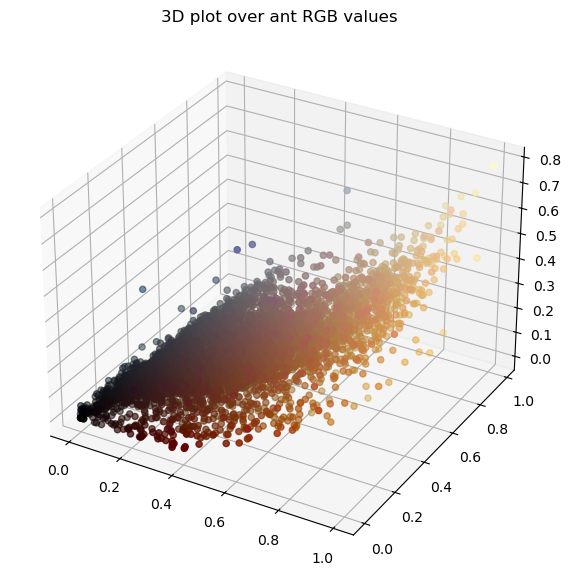

In [24]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
colors = np.array(colors)
# Creating plot
ax.scatter3D(colors[:,0], colors[:,1], colors[:,2], color = colors)
plt.title("3D plot over ant RGB values")
 
# show plot
plt.show()